In [3]:
import pandas as pd

waterdataset = r"D:\Sudheer\DM & BI\Module 4\water_dataset_v_05.14.24.csv"

# Load the dataset from Colab storage
df = pd.read_csv(waterdataset)

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2541792 entries, 0 to 2541791
Data columns (total 20 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   TIMESTAMP                  object 
 1   CITY                       object 
 2   ZIP                        int64  
 3   EGRIDREGION                object 
 4   TEMPERATUREF               int64  
 5   HUMIDITY                   int64  
 6   DATA_AVAILABILITY_WEATHER  int64  
 7   WETBULBTEMPERATUREF        float64
 8   COAL                       float64
 9   HYDRO                      float64
 10  NATURALGAS                 float64
 11  NUCLEAR                    float64
 12  OTHER                      float64
 13  PETROLEUM                  float64
 14  SOLAR                      float64
 15  WIND                       int64  
 16  DATA_AVAILABILITY_ENERGY   int64  
 17  ONSITEWUEFIXEDAPPROACH     float64
 18  ONSITEWUEFIXEDCOLDWATER    float64
 19  OFFSITEWUE                 f

In [4]:
# Handle missing values
df["OFFSITEWUE"].fillna(df["OFFSITEWUE"].median(), inplace=True)

# Ensure all energy-related columns do not have negative values
energy_columns = ["COAL", "HYDRO", "NATURALGAS", "NUCLEAR", "OTHER", "PETROLEUM", "SOLAR", "WIND"]
df[energy_columns] = df[energy_columns].applymap(lambda x: max(x, 0))

# Verify if missing values exist
print("Missing Values After Cleaning:")
print(df.isnull().sum())

# Verify if negative values remain
print("\nNegative Values After Cleaning (Should be 0):")
print((df[energy_columns] < 0).sum())


C:\Users\thiss\AppData\Local\Temp\ipykernel_32252\3136503885.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["OFFSITEWUE"].fillna(df["OFFSITEWUE"].median(), inplace=True)
C:\Users\thiss\AppData\Local\Temp\ipykernel_32252\3136503885.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[energy_columns] = df[energy_columns].applymap(lambda x: max(x, 0))


Missing Values After Cleaning:
TIMESTAMP                    0
CITY                         0
ZIP                          0
EGRIDREGION                  0
TEMPERATUREF                 0
HUMIDITY                     0
DATA_AVAILABILITY_WEATHER    0
WETBULBTEMPERATUREF          0
COAL                         0
HYDRO                        0
NATURALGAS                   0
NUCLEAR                      0
OTHER                        0
PETROLEUM                    0
SOLAR                        0
WIND                         0
DATA_AVAILABILITY_ENERGY     0
ONSITEWUEFIXEDAPPROACH       0
ONSITEWUEFIXEDCOLDWATER      0
OFFSITEWUE                   0
dtype: int64

Negative Values After Cleaning (Should be 0):
COAL          0
HYDRO         0
NATURALGAS    0
NUCLEAR       0
OTHER         0
PETROLEUM     0
SOLAR         0
WIND          0
dtype: int64


In [5]:
# Convert TIMESTAMP to datetime format
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"])

# Extract useful time-based features
df["YEAR"] = df["TIMESTAMP"].dt.year
df["MONTH"] = df["TIMESTAMP"].dt.month
df["HOUR"] = df["TIMESTAMP"].dt.hour

# Convert categorical variables to category dtype for efficiency
df["CITY"] = df["CITY"].astype("category")
df["EGRIDREGION"] = df["EGRIDREGION"].astype("category")

# Confirm changes
print("Data Types After Processing:")
print(df.dtypes)

# Display first few rows after transformation
print("\nFirst 5 Rows After Processing:")
print(df.head())


Data Types After Processing:
TIMESTAMP                    datetime64[ns]
CITY                               category
ZIP                                   int64
EGRIDREGION                        category
TEMPERATUREF                          int64
HUMIDITY                              int64
DATA_AVAILABILITY_WEATHER             int64
WETBULBTEMPERATUREF                 float64
COAL                                float64
HYDRO                               float64
NATURALGAS                          float64
NUCLEAR                             float64
OTHER                               float64
PETROLEUM                           float64
SOLAR                               float64
WIND                                  int64
DATA_AVAILABILITY_ENERGY              int64
ONSITEWUEFIXEDAPPROACH              float64
ONSITEWUEFIXEDCOLDWATER             float64
OFFSITEWUE                          float64
YEAR                                  int32
MONTH                                 int32
HOU

<Figure size 1200x500 with 0 Axes>

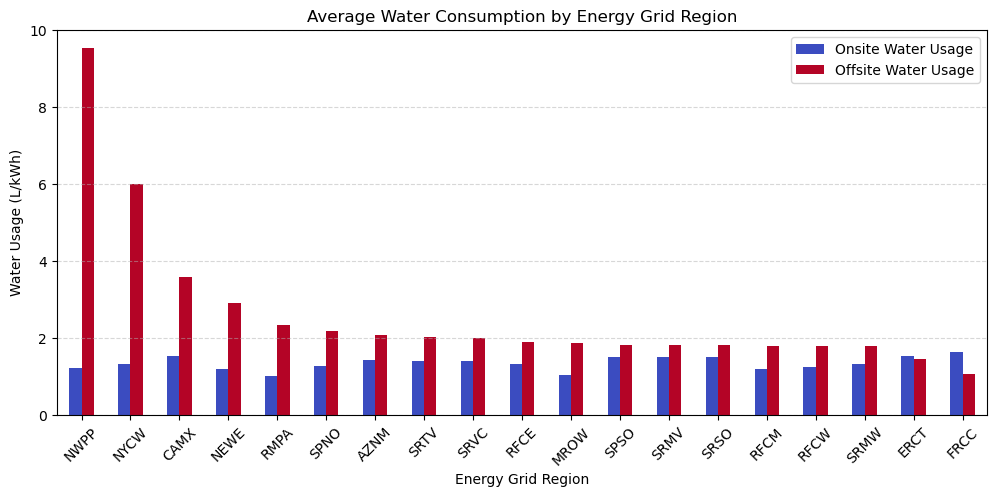

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by EGRIDREGION
df_grouped = df.groupby("EGRIDREGION", observed=False)[["ONSITEWUEFIXEDAPPROACH", "OFFSITEWUE"]].mean().sort_values(by="OFFSITEWUE", ascending=False)

# Plot
plt.figure(figsize=(12, 5))
df_grouped.plot(kind="bar", colormap="coolwarm", figsize=(12,5))
plt.title("Average Water Consumption by Energy Grid Region")
plt.xlabel("Energy Grid Region")
plt.ylabel("Water Usage (L/kWh)")
plt.xticks(rotation=45)
plt.legend(["Onsite Water Usage", "Offsite Water Usage"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


<Figure size 1200x500 with 0 Axes>

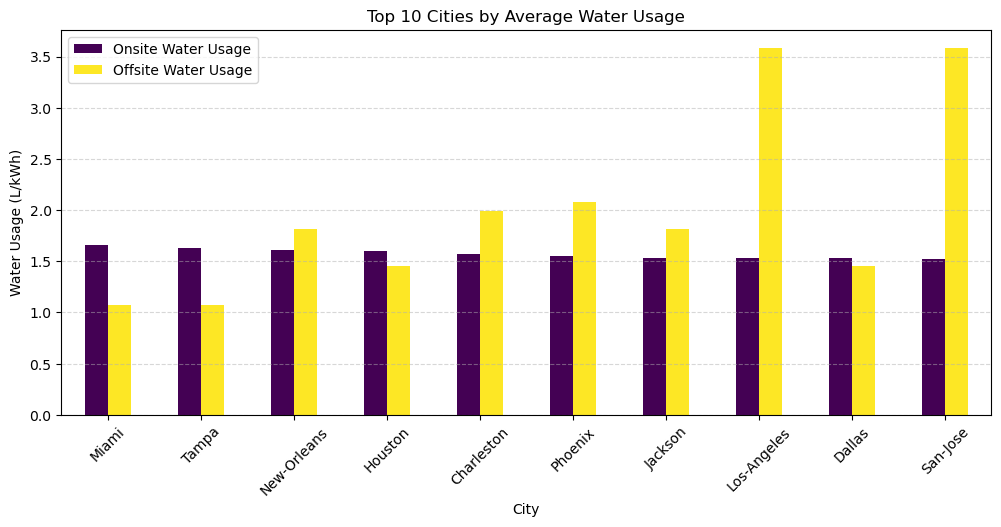

In [7]:
# Group data by CITY
df_city = df.groupby("CITY", observed=False)[["ONSITEWUEFIXEDAPPROACH", "OFFSITEWUE"]].mean().sort_values(by="ONSITEWUEFIXEDAPPROACH", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 5))
df_city.plot(kind="bar", colormap="viridis", figsize=(12,5))
plt.title("Top 10 Cities by Average Water Usage")
plt.xlabel("City")
plt.ylabel("Water Usage (L/kWh)")
plt.xticks(rotation=45)
plt.legend(["Onsite Water Usage", "Offsite Water Usage"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


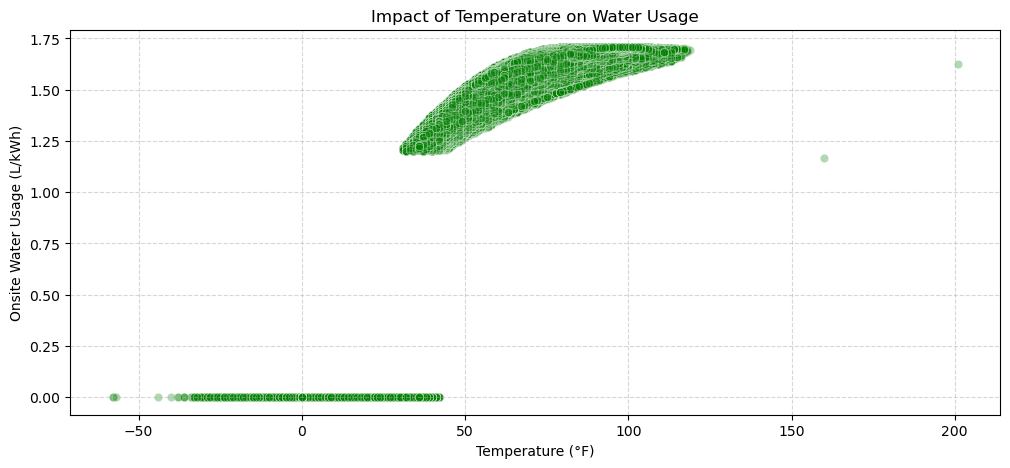

In [8]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["TEMPERATUREF"], y=df["ONSITEWUEFIXEDAPPROACH"], alpha=0.3, color="green")
plt.title("Impact of Temperature on Water Usage")
plt.xlabel("Temperature (°F)")
plt.ylabel("Onsite Water Usage (L/kWh)")
plt.grid(linestyle="--", alpha=0.5)
plt.show()


<Figure size 1200x500 with 0 Axes>

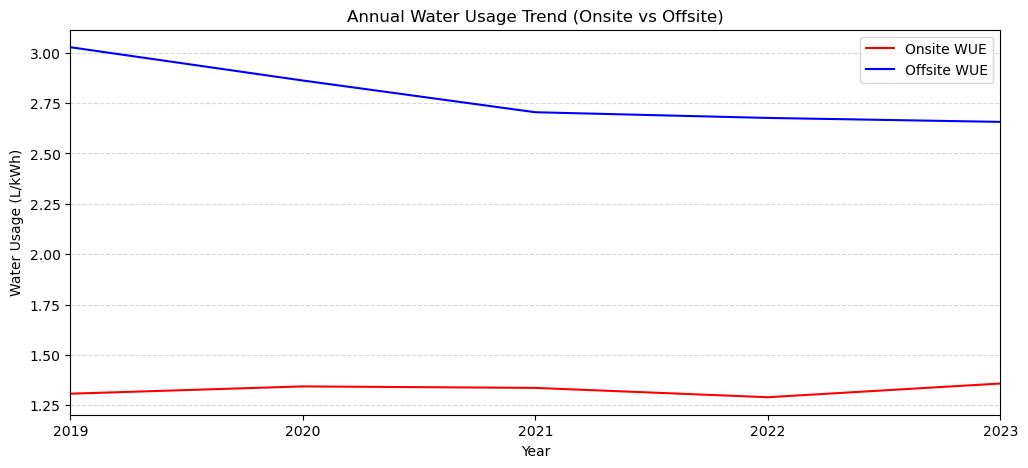

In [9]:
# Resample data yearly
df_resampled = df.resample("YE", on="TIMESTAMP")[["ONSITEWUEFIXEDAPPROACH", "OFFSITEWUE"]].mean()

# Plot
plt.figure(figsize=(12, 5))
df_resampled.plot(figsize=(12,5), color=["red", "blue"])
plt.title("Annual Water Usage Trend (Onsite vs Offsite)")
plt.xlabel("Year")
plt.ylabel("Water Usage (L/kWh)")
plt.legend(["Onsite WUE", "Offsite WUE"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


<Figure size 1200x500 with 0 Axes>

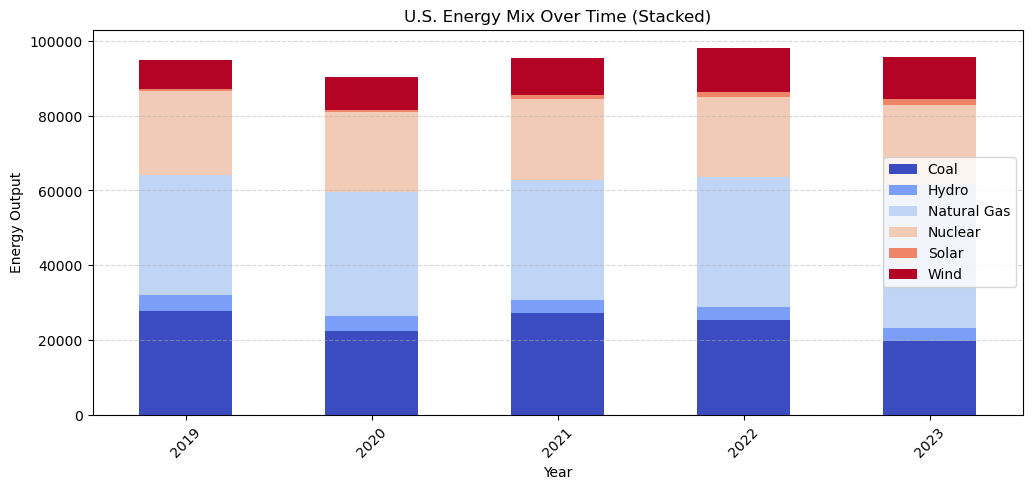

In [10]:
# Group energy data yearly
df_energy = df.groupby(df["TIMESTAMP"].dt.year, observed=False)[["COAL", "HYDRO", "NATURALGAS", "NUCLEAR", "SOLAR", "WIND"]].mean()

# Plot
plt.figure(figsize=(12, 5))
df_energy.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12,5))
plt.title("U.S. Energy Mix Over Time (Stacked)")
plt.xlabel("Year")
plt.ylabel("Energy Output")
plt.xticks(rotation=45)
plt.legend(["Coal", "Hydro", "Natural Gas", "Nuclear", "Solar", "Wind"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()



📊 Numerical Correlation Matrix with TOTAL_WUE:
TOTAL_WUE                    1.000000
OFFSITEWUE                   0.973716
HYDRO                        0.794752
ZIP                          0.300623
ONSITEWUEFIXEDAPPROACH       0.162995
TEMPERATUREF                 0.060083
DATA_AVAILABILITY_WEATHER    0.055253
WETBULBTEMPERATUREF          0.037636
ONSITEWUEFIXEDCOLDWATER      0.028461
HOUR                         0.003346
SOLAR                       -0.001265
DATA_AVAILABILITY_ENERGY    -0.001539
MONTH                       -0.013701
HUMIDITY                    -0.029160
PETROLEUM                   -0.045529
YEAR                        -0.052369
OTHER                       -0.219318
WIND                        -0.225658
COAL                        -0.359460
NATURALGAS                  -0.387313
NUCLEAR                     -0.442982
Name: TOTAL_WUE, dtype: float64


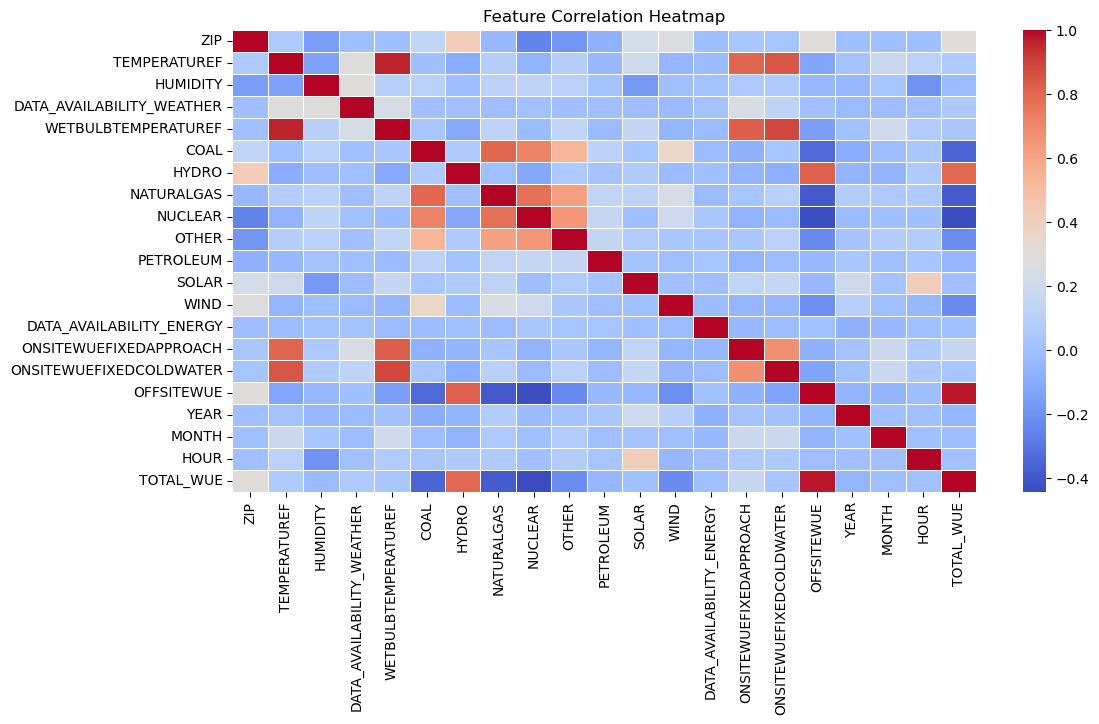

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1️⃣ Create the new target variable
df["TOTAL_WUE"] = df["ONSITEWUEFIXEDAPPROACH"] + df["OFFSITEWUE"]

# 2️⃣ Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# 3️⃣ Print the numerical correlation matrix
print("\n📊 Numerical Correlation Matrix with TOTAL_WUE:")
print(correlation_matrix["TOTAL_WUE"].sort_values(ascending=False))

# 4️⃣ Display correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



In [12]:
# ✅ Select relevant numerical & categorical features
selected_features = ["OFFSITEWUE", "HYDRO", "ZIP", "NUCLEAR", "NATURALGAS", "COAL"]
categorical_features = ["EGRIDREGION"]  # Keep only one categorical variable

# ✅ Splitting data
X = df[selected_features + categorical_features]
y = df["TOTAL_WUE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Preprocessing pipeline (Scaling & Encoding)
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), selected_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Apply transformation to training & test sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# ✅ Print shape confirmation
print(f"✅ Training Set Shape: {X_train_transformed.shape}, Testing Set Shape: {X_test_transformed.shape}")

# ✅ Re-initialize models with optimized settings
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42),  # Faster execution
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
}

# 🔟 Train & evaluate each model
results = {}

for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    
    # Train model
    model.fit(X_train_transformed, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_transformed)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}
    
    # Print model performance
    print(f"✅ {name} Performance:")
    print(f"   MAE: {mae:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   R² Score: {r2:.4f}")

# ✅ Convert results to DataFrame for comparison
results_df = pd.DataFrame(results).T
print("\n📊 Model Comparison Results:")
print(results_df)


✅ Training Set Shape: (2033433, 25), Testing Set Shape: (508359, 25)

🚀 Training Linear Regression...


C:\Users\thiss\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


✅ Linear Regression Performance:
   MAE: 0.3470
   RMSE: 0.5093
   R² Score: 0.9539

🚀 Training Random Forest...


C:\Users\thiss\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


✅ Random Forest Performance:
   MAE: 0.2956
   RMSE: 0.4569
   R² Score: 0.9629

🚀 Training XGBoost...
✅ XGBoost Performance:
   MAE: 0.3010
   RMSE: 0.4563
   R² Score: 0.9630

📊 Model Comparison Results:
                        MAE      RMSE  R² Score
Linear Regression  0.347019  0.509310  0.953885
Random Forest      0.295634  0.456852  0.962896
XGBoost            0.300976  0.456286  0.962987


C:\Users\thiss\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


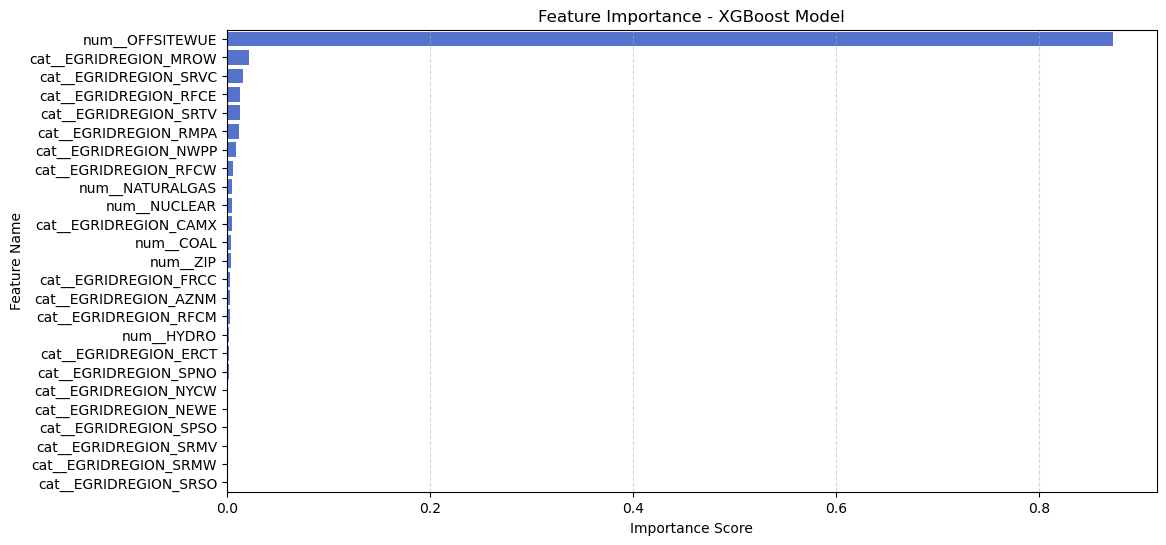


📊 Feature Importance Rankings:
                  Feature  Random Forest   XGBoost
0         num__OFFSITEWUE   9.871150e-01  0.872178
10  cat__EGRIDREGION_MROW   1.202394e-03  0.021286
24  cat__EGRIDREGION_SRVC   9.198005e-06  0.015484
14  cat__EGRIDREGION_RFCE   8.918647e-05  0.013331
23  cat__EGRIDREGION_SRTV   3.360595e-05  0.012773
17  cat__EGRIDREGION_RMPA   9.178444e-04  0.012012
12  cat__EGRIDREGION_NWPP   7.247777e-08  0.008759
16  cat__EGRIDREGION_RFCW   3.200670e-04  0.006095
4         num__NATURALGAS   1.712891e-03  0.005089
3            num__NUCLEAR   4.361578e-03  0.004741
7   cat__EGRIDREGION_CAMX   6.912024e-05  0.004598
5               num__COAL   2.101876e-03  0.004280
2                num__ZIP   1.212525e-03  0.003804
9   cat__EGRIDREGION_FRCC   0.000000e+00  0.003110
6   cat__EGRIDREGION_AZNM   1.488438e-05  0.003087
15  cat__EGRIDREGION_RFCM   1.292214e-05  0.002966
1              num__HYDRO   7.705934e-04  0.002266
8   cat__EGRIDREGION_ERCT   4.725992e-06  0.001984

In [13]:
  # ✅ Feature Importance Analysis for Random Forest & XGBoost
importances_rf = models["Random Forest"].feature_importances_
importances_xgb = models["XGBoost"].feature_importances_

# Create a DataFrame for feature importances
feature_names = preprocessor.get_feature_names_out()
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Random Forest": importances_rf,
    "XGBoost": importances_xgb
})

# Sort by most important features
importance_df = importance_df.sort_values(by="XGBoost", ascending=False)

# 📊 Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x="XGBoost", y="Feature", data=importance_df, color="royalblue")
plt.title("Feature Importance - XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

# ✅ Print Feature Importance Table
print("\n📊 Feature Importance Rankings:")
print(importance_df)


In [14]:
#### Final Model with expnaded features aiming for refinment

# ✅ Manually Selecting Features with Moderate Correlation
selected_features = ["OFFSITEWUE", "HYDRO", "ZIP", "NUCLEAR", "NATURALGAS", "COAL"]

# ✅ Re-split Data with New Features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# ✅ Retrain XGBoost with Expanded Features
xgb_expanded = XGBRegressor(
    n_estimators=300,  # Increased estimators for better learning
    learning_rate=0.02,  # Slower learning rate for stability
    max_depth=10,  # Ensures balanced complexity
    subsample=0.9,  
    colsample_bytree=0.9,  
    random_state=42
)

xgb_expanded.fit(X_train_selected, y_train)

# ✅ Make Predictions
y_pred_expanded = xgb_expanded.predict(X_test_selected)

# ✅ Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred_expanded)
rmse = mean_squared_error(y_test, y_pred_expanded, squared=False)
r2 = r2_score(y_test, y_pred_expanded)

# ✅ Print Model Results
print("\n🚀 XGBoost Model Performance with Expanded Features:")
print(f"   MAE: {mae:.4f}")
print(f"   RMSE: {rmse:.4f}")
print(f"   R² Score: {r2:.4f}")



🚀 XGBoost Model Performance with Expanded Features:
   MAE: 0.2579
   RMSE: 0.4095
   R² Score: 0.9702


C:\Users\thiss\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\thiss\AppData\Local\Temp\ipykernel_32252\1907924855.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


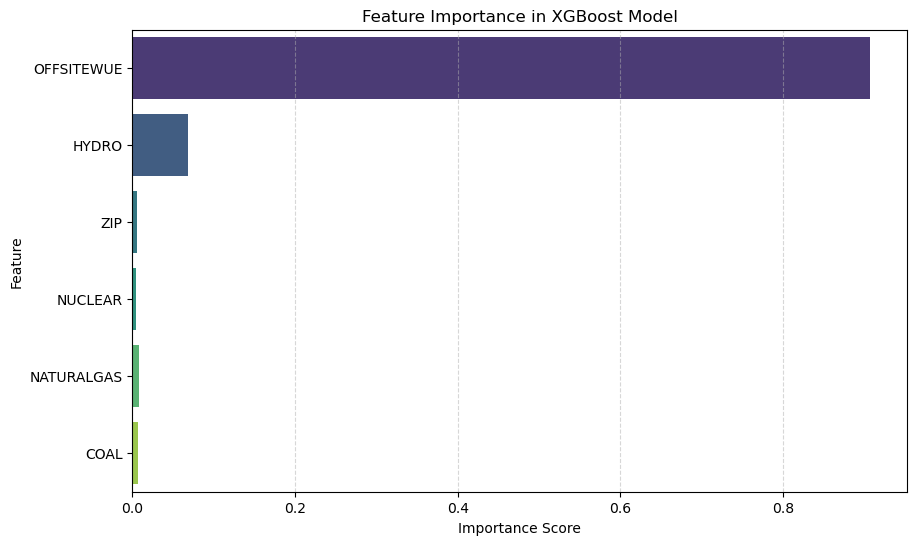

['OFFSITEWUE', 'HYDRO', 'ZIP', 'NUCLEAR', 'NATURALGAS', 'COAL']
[0.90760356 0.06830436 0.0052266  0.0039904  0.0076288  0.00724628]


In [15]:
# ✅ Feature Importance Plot for the above best Xgboost, performing model
importances = xgb_expanded.feature_importances_
feature_names = selected_features  # Names of selected features

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance in XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()
print(feature_names)
print(importances)

In [16]:
### Hyper parameter tuning for Xgboost

from sklearn.model_selection import RandomizedSearchCV

# ✅ Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 6, 9],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}

# ✅ Perform Randomized Search
xgb_tuned = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(xgb_tuned, param_grid, scoring="neg_mean_absolute_error", cv=3, n_jobs=-1, verbose=2)
random_search.fit(X_train_selected, y_train)

# ✅ Print best hyperparameters
print("\n🔍 Best Hyperparameters Found:")
print(random_search.best_params_)

# ✅ Evaluate best model
best_xgb = random_search.best_estimator_
y_pred_best = best_xgb.predict(X_test_selected)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

print("\n🚀 Tuned XGBoost Model Performance:")
print(f"   MAE: {mae_best:.4f}")
print(f"   RMSE: {rmse_best:.4f}")
print(f"   R² Score: {r2_best:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits

🔍 Best Hyperparameters Found:
{'subsample': 0.9, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.9}

🚀 Tuned XGBoost Model Performance:
   MAE: 0.2341
   RMSE: 0.3796
   R² Score: 0.9744


C:\Users\thiss\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


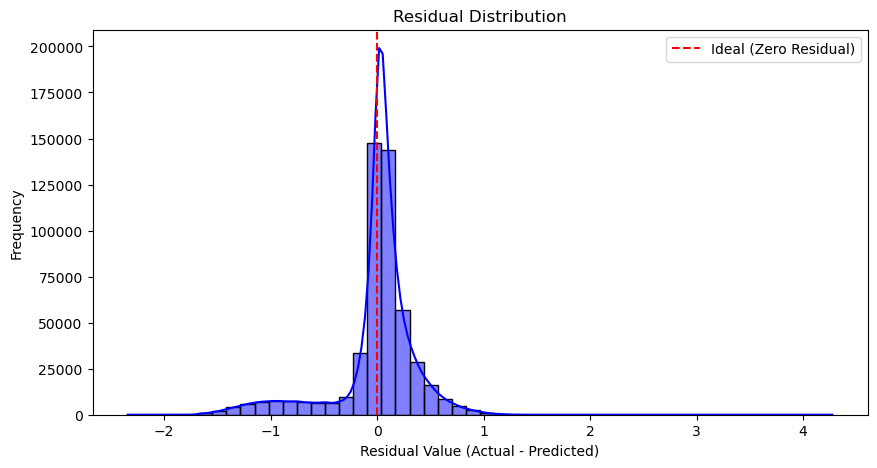

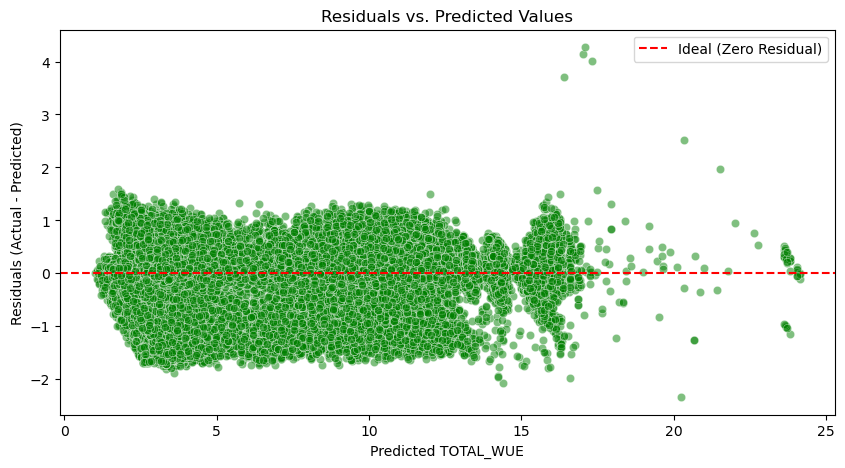

C:\Users\thiss\AppData\Local\Temp\ipykernel_32252\631888514.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=top_features, palette="viridis")


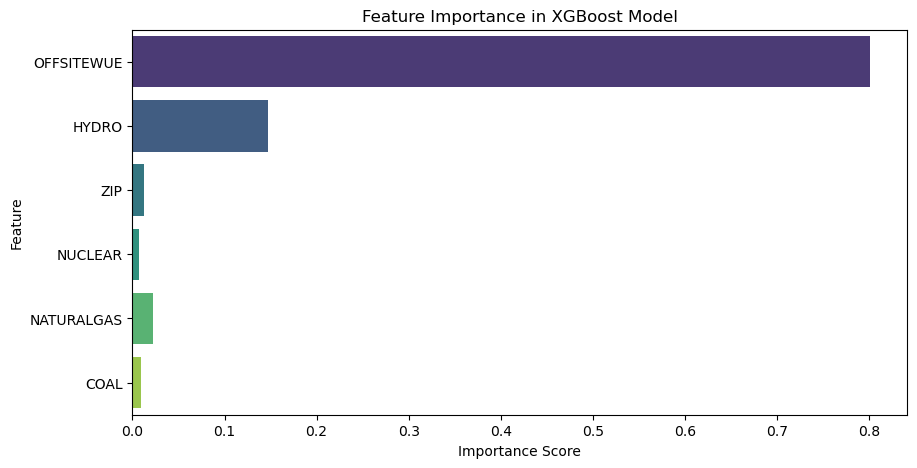

💡 Estimated Water Usage Reduction by Reducing OFFSITEWUE by 10%: 0.3633 L/kWh


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1️⃣ RESIDUAL ANALYSIS ###

# ✅ Compute Residuals (Error)
residuals = y_test - y_pred_best  # Using best_xgb predictions from hyperparameter tuning

# ✅ Plot Residual Histogram
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=50, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--", label="Ideal (Zero Residual)")
plt.title("Residual Distribution")
plt.xlabel("Residual Value (Actual - Predicted)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# ✅ Plot Residuals vs. Predicted Values
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.5, color="green")
plt.axhline(y=0, color="red", linestyle="--", label="Ideal (Zero Residual)")
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted TOTAL_WUE")
plt.ylabel("Residuals (Actual - Predicted)")
plt.legend()
plt.show()

# 🔍 Interpretation:
# If residuals are randomly distributed around zero, our model is unbiased.
# If there's a pattern, further tuning or feature engineering may be needed.



### 2️⃣ PRESCRIPTIVE ANALYTICS ###

# ✅ Key Feature Influence (Extract top features)
top_features = ["OFFSITEWUE", "HYDRO", "ZIP", "NUCLEAR", "NATURALGAS", "COAL"]
feature_importance = best_xgb.feature_importances_

# ✅ Plot Feature Importance
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance, y=top_features, palette="viridis")
plt.title("Feature Importance in XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# ✅ Simulate "What-If" Scenarios
# Example: What happens if OFFSITEWUE is reduced by 10%?
df_simulation = X_test_selected.copy()
df_simulation["OFFSITEWUE"] *= 0.9  # Reduce OFFSITEWUE by 10%

# ✅ Predict with Adjusted Features
y_pred_simulated = best_xgb.predict(df_simulation)

# ✅ Compare Water Usage Reduction
water_savings = np.mean(y_test - y_pred_simulated)

print(f"💡 Estimated Water Usage Reduction by Reducing OFFSITEWUE by 10%: {water_savings:.4f} L/kWh")

# 🔍 Interpretation:
# If reducing OFFSITEWUE significantly lowers TOTAL_WUE, focus on optimizing energy mix and cooling technologies.
# If another factor (e.g., HYDRO) has more impact, prioritize water-efficient energy sources.


In [18]:
import numpy as np

# ✅ Step 1: Compute Current Total Annual Water Consumption
# Multiply TOTAL_WUE by the number of hours in a year (24 * 365) to get an estimated yearly usage.
annual_water_consumption = df["TOTAL_WUE"].mean() * 24 * 365  

# ✅ Step 2: Apply Prescriptive Recommendation (Reduce OFFSITEWUE by 10%)
# Reduce the OFFSITEWUE component by 10% and compute the new estimated total water usage.
df["NEW_OFFSITEWUE"] = df["OFFSITEWUE"] * 0.90  # Applying a 10% reduction
df["NEW_TOTAL_WUE"] = df["ONSITEWUEFIXEDAPPROACH"] + df["NEW_OFFSITEWUE"]

# ✅ Step 3: Compute New Annual Water Consumption After Applying Recommendations
new_annual_water_consumption = df["NEW_TOTAL_WUE"].mean() * 24 * 365  

# ✅ Step 4: Calculate Annual Water Savings
annual_water_savings = annual_water_consumption - new_annual_water_consumption

# ✅ Step 5: Print the Results
print("💧 **Estimated Water Usage Reduction with Prescriptive Analytics** 💧")
print(f"📌 Current Annual Water Consumption: {annual_water_consumption:.2f} L")
print(f"📌 Projected Annual Water Consumption (After Reduction): {new_annual_water_consumption:.2f} L")
print(f"💡 **Estimated Annual Water Savings**: {annual_water_savings:.2f} L")


💧 **Estimated Water Usage Reduction with Prescriptive Analytics** 💧
📌 Current Annual Water Consumption: 36026.53 L
📌 Projected Annual Water Consumption (After Reduction): 33586.59 L
💡 **Estimated Annual Water Savings**: 2439.94 L


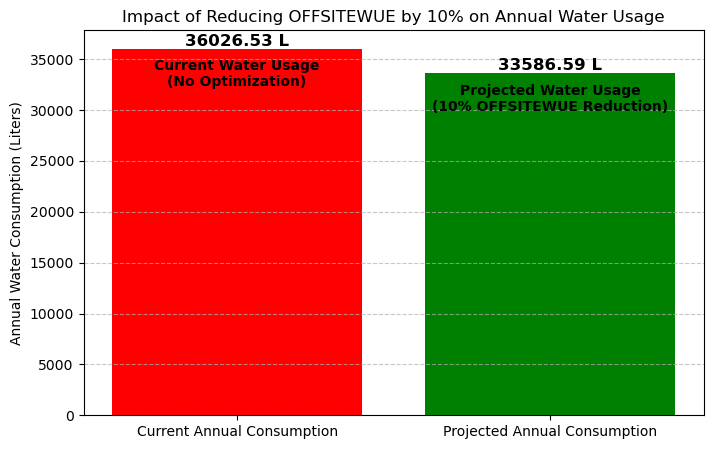

In [19]:
import matplotlib.pyplot as plt

# Data for visualization
categories = ["Current Annual Consumption", "Projected Annual Consumption"]
values = [36026.53, 33586.59]
colors = ['red', 'green']

# Create bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=colors)

# Annotate values on bars
for bar, label in zip(bars, categories):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f} L", 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add annotations to explain the bars
plt.text(0, values[0] - 1000, "Current Water Usage\n(No Optimization)", 
         ha='center', va='top', fontsize=10, fontweight='bold', color='black')
plt.text(1, values[1] - 1000, "Projected Water Usage\n(10% OFFSITEWUE Reduction)", 
         ha='center', va='top', fontsize=10, fontweight='bold', color='black')

# Labels and title
plt.ylabel("Annual Water Consumption (Liters)")
plt.title("Impact of Reducing OFFSITEWUE by 10% on Annual Water Usage")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [20]:
# ✅ Save the trained XGBoost model
best_xgb.save_model("xgboost_model.json")

print("✅ Model saved successfully as 'xgboost_model.json'")


✅ Model saved successfully as 'xgboost_model.json'


In [39]:
import os
print("📂 Your current working directory is:", os.getcwd())


📂 Your current working directory is: C:\Users\thiss\Downloads
